In [1]:
!pip install opencv-python

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cv2.__version__

'4.10.0'

In [4]:
image = cv2.imread('images/plane.jpg', cv2.IMREAD_GRAYSCALE)
image.shape #(2270, 3600)

(2270, 3600)

In [5]:
# plt.imshow(image.reshape(3600,2270));plt.show()

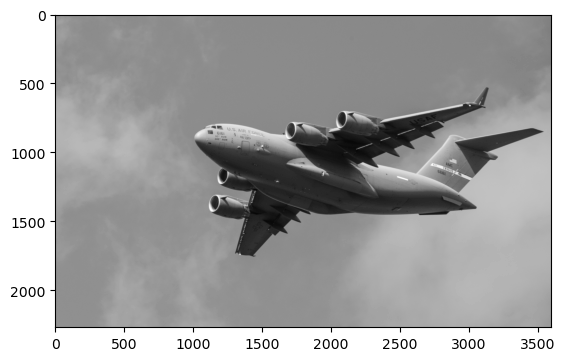

In [6]:
plt.imshow(image, cmap='gray');plt.show()

In [7]:
image

array([[140, 136, 146, ..., 132, 139, 134],
       [144, 136, 149, ..., 142, 124, 126],
       [152, 139, 144, ..., 121, 127, 134],
       ...,
       [156, 146, 144, ..., 157, 154, 151],
       [146, 150, 147, ..., 156, 158, 157],
       [143, 138, 147, ..., 156, 157, 157]], dtype=uint8)

In [8]:
image2 = image
image2[:] = 255

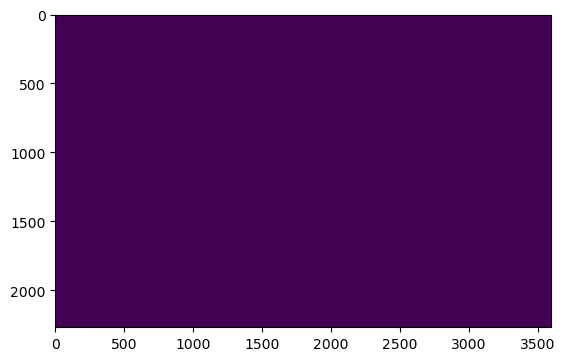

In [9]:
plt.imshow(image2);plt.show();

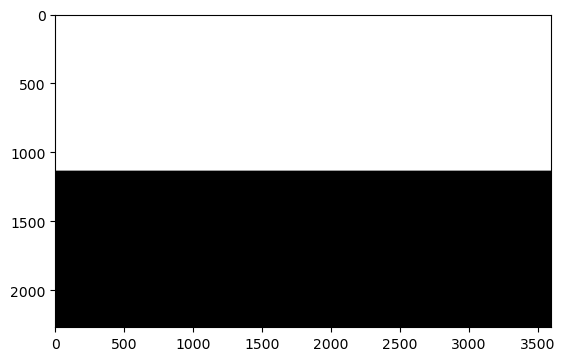

(2270, 3600)

In [10]:
image3 = image
x = int(image.shape[0]/2)
image3[:x] = 255
image3[x+1:] = 0
plt.imshow(image3, cmap='gray');plt.show()
image3.shape

In [11]:
image6= image
x = int(image6.shape[0] / 2)  # 이미지 높이의 절반
y = int(image6.shape[1] / 2)  # 이미지 너비의 절반

x_half = int(x / 2)  # 높이의 절반
y_half = int(y / 2)  # 너비의 절반
x_half, y_half

(567, 900)

In [12]:
# 이미지 로드 (흑백 이미지)
image2 = cv2.imread('images/plane.jpg', cv2.IMREAD_GRAYSCALE)

# 이미지 크기 계산
x = int(image2.shape[0] / 2)  # 높이 절반
y = int(image2.shape[1] / 2)  # 너비 절반

# 이미지 4등분
array_image = [
    image2[:x, :y],   # 좌상단
    image2[:x, y:],   # 우상단
    image2[x:, :y],   # 좌하단
    image2[x:, y:]    # 우하단
]

# 4등분된 이미지 저장
cnt = 1
for i in array_image:
    filename = 'images/j' + str(cnt) + '.jpg'
    if cv2.imwrite(filename, i):
        print(f"Saved: {filename}")
    else:
        print(f"Failed to save: {filename}")
    cnt += 1

Saved: images/j1.jpg
Saved: images/j2.jpg
Saved: images/j3.jpg
Saved: images/j4.jpg


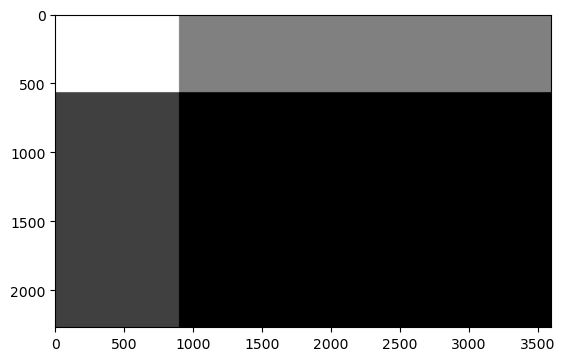

(2270, 3600)

In [13]:
image5= image
image5[:x_half,:y_half]=255
image5[:x_half, y_half:]=128
image5[x_half:,:y_half]=64
image5[x_half:,y_half:]=0
plt.imshow(image5, cmap='gray');plt.show()
image5.shape

## 이미지 읽을때 openCV는 BGR로 읽고 , Matplotlib는 RGB로 읽는다.

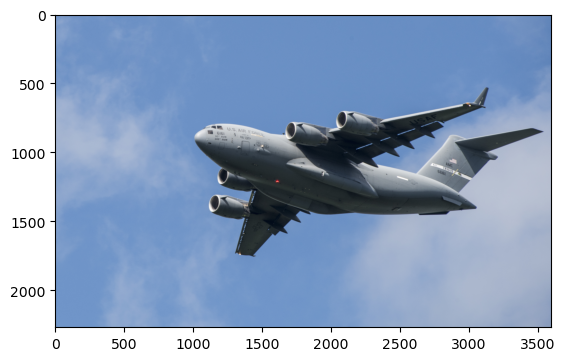

In [15]:
# 컬러 이미지
image_bgr = cv2.imread('images/plane.jpg', cv2.IMREAD_COLOR)
image_bgr

#RGB타입으로 변환
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB) #cvt => conver , BGR을 RGB로 변환

#plot
plt.imshow(image_rgb);plt.show()

In [16]:
# 이미지 로드
image = cv2.imread('images/plane.jpg',cv2.IMREAD_GRAYSCALE)

# 이미지 저장
cv2.imwrite('images/hello.jpg', image) # true , false 값을 반환

True

(50, 50)


Text(0.5, 1.0, 'Resized Image')

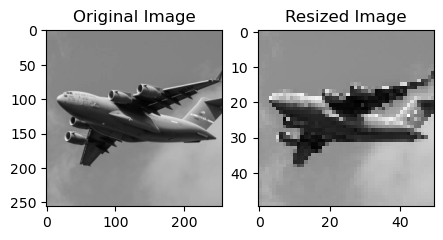

In [17]:
#이미지 크기변경
image = cv2.imread('images/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)

#이미지 크기를 50X50으로 변경
image_50x50 = cv2.resize(image,(50,50))
print(image_50x50.shape)

#출력
fig, ax = plt.subplots(1,2,figsize = (5,5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(image_50x50, cmap='gray')
ax[1].set_title('Resized Image')

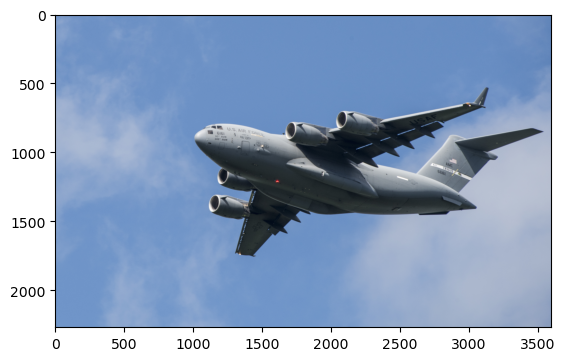

In [25]:
# 컬러 이미지
image_bgr = cv2.imread('images/plane.jpg', cv2.IMREAD_COLOR)
image_bgr

#RGB타입으로 변환
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB) #cvt => conver , BGR을 RGB로 변환

#plot
plt.imshow(image_rgb);plt.show()

In [ ]:
## 이미지 Blur처리 ( 흐릿하게 하다 ) => 저주파만 통과한다 (Low Pass Filter) , 저 (저 주파수) pass (통과) filter (거르다)

In [29]:
image = cv2.imread('images/plane_256x256.jpg', cv2.IMREAD_GRAYSCALE)
image.shape

(256, 256)

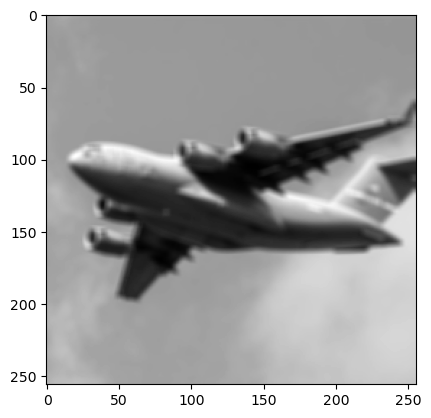

In [31]:
image_blurry = cv2.blur(image,(5,5))
plt.imshow(image_blurry, cmap = 'gray')
plt.show()

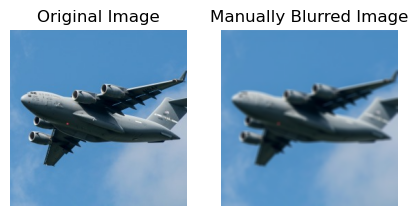

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_blur(image, kernel_size=(5, 5)):
    # Create a normalized kernel
    kernel = np.ones(kernel_size, np.float32) / (kernel_size[0] * kernel_size[1])
    
    # Get image dimensions
    height, width = image.shape[:2]
    
    # Padding size
    pad_h = kernel_size[0] // 2
    pad_w = kernel_size[1] // 2
    
    # Pad the image to handle border effects
    padded_image = cv2.copyMakeBorder(image, pad_h, pad_h, pad_w, pad_w, cv2.BORDER_REFLECT)
    
    # Prepare an empty output image
    blurry_image = np.zeros_like(image, dtype=np.uint8)
    
    # Perform convolution
    for i in range(height):
        for j in range(width):
            for c in range(image.shape[2]):  # Handle color channels (e.g., BGR)
                blurry_image[i, j, c] = np.sum(
                    kernel * padded_image[i:i + kernel_size[0], j:j + kernel_size[1], c]
                )
    
    return blurry_image

# Load the input image
image = cv2.imread('images/plane_256x256.jpg')

# Apply custom blur
image_blurry = apply_blur(image, kernel_size=(5, 5))

# Display the original and blurry images
plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_blurry, cv2.COLOR_BGR2RGB))
plt.title('Manually Blurred Image')
plt.axis('off')

plt.show()

In [35]:
np.ones((10,5)) # tuple 전달

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [37]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [39]:
 # Create a normalized kernel
image = cv2.imread("images/plane.jpg", cv2.IMREAD_GRAYSCALE)
kernel_size = (5,5)
kernel = np.ones(kernel_size, np.float32) / (kernel_size[0] * kernel_size[1])
    
# Get image dimensions
height, width = image.shape[:2]
    
# Padding size
pad_h = kernel_size[0] // 2
pad_w = kernel_size[1] // 2
print(pad_h, pad_w)
    
# Pad the image to handle border effects
padded_image = cv2.copyMakeBorder(image, pad_h, pad_h, pad_w, pad_w, cv2.BORDER_REFLECT)
    
# Prepare an empty output imagebb
blurry_image = np.zeros_like(image, dtype=np.uint8)

2 2


In [41]:
kernel_test = np.zeros((10,5), np.float32)/50
w = kernel_test
w

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)

In [43]:
kernel_test = np.zeros((10,5), np.float32)/50
# w,h = kernel_test.shape
w,h = kernel_test.shape[:2] # 2는 포함하지 않음 
w,h

(10, 5)

In [45]:
kernel_test = np.zeros((10,5,3), np.float32)/50

# 아래 3가지 코드가 모두 같은 값 
# w,h,c= kernel_test.shape
# w,h,c= kernel_test.shape[:3]
w,h,c= kernel_test.shape[:]

w,h,c

(10, 5, 3)

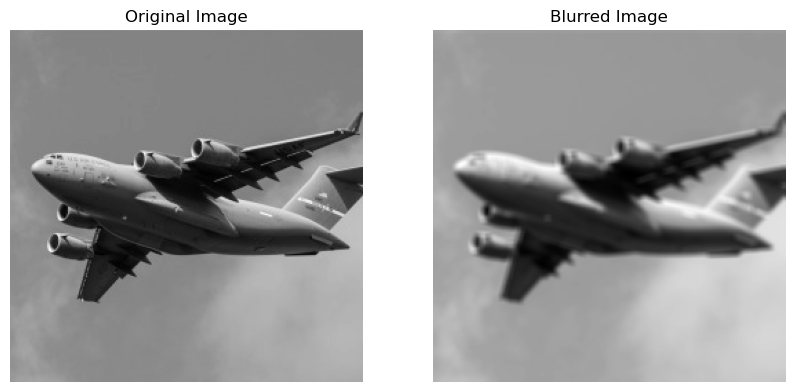

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread("images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)
kernel_size = (5,5)

# Define the kernel size
kernel = np.ones(kernel_size, np.float32) / (5 * 5)

# Apply the filter using cv2c.filter2D
blurred_image = cv2.filter2D(image, -1, kernel)

# Display the original and blurred images
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')  # Grayscale image, no color conversion needed
plt.title('Original Image')
plt.axis('off')

# Blurred image
plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap='gray')  # Grayscale image, no color conversion needed
plt.title('Blurred Image')
plt.axis('off')

plt.show()

In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread("images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)
kernel_sizes = []

for i in range(20):
    kernel_sizes.append((2*i+1, 2*i+1))
kernel_sizes

[(1, 1),
 (3, 3),
 (5, 5),
 (7, 7),
 (9, 9),
 (11, 11),
 (13, 13),
 (15, 15),
 (17, 17),
 (19, 19),
 (21, 21),
 (23, 23),
 (25, 25),
 (27, 27),
 (29, 29),
 (31, 31),
 (33, 33),
 (35, 35),
 (37, 37),
 (39, 39)]

In [59]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread("images/plane_256x256.jpg", cv2.IMREAD_GRAYSCALE)
kernel_sizes = [(2*i+1, 2*i+1) for i in range(20)]
kernel_sizes

[(1, 1),
 (3, 3),
 (5, 5),
 (7, 7),
 (9, 9),
 (11, 11),
 (13, 13),
 (15, 15),
 (17, 17),
 (19, 19),
 (21, 21),
 (23, 23),
 (25, 25),
 (27, 27),
 (29, 29),
 (31, 31),
 (33, 33),
 (35, 35),
 (37, 37),
 (39, 39)]